#  <span style='color:midnightblue'>  Time Series Analysis: Energy Consumption Forecasting

We are given the monthly energy consumption data in the US from 1973 to 2019. This time series is taken from the statistical data set owned by the US energy information administration.  A new energy policy for next year, you are asked to make a forecast of energy consumption by the residential sector in US for next year (October 2019– September 2020). 

##  <span style='color:royalblue'>  1. Load required libraries </span>

In [40]:
library(ggplot2)
library(ggfortify)
library(forecast)
library(readxl)

##  <span style='color:royalblue'>  2. Load Dataset </span>

In [25]:
SectorData<-read_excel("./energy.xlsx")
head(SectorData,5)

Total Energy Consumed by the Residential Sector,Total Energy Consumed by the Commercial Sector,Total Energy Consumed by the Industrial Sector,Total Energy Consumed by the Transportation Sector
1957.641,1080.680,2673.882,1507.977
1712.143,1003.913,2432.592,1441.064
1510.079,886.420,2561.729,1564.146
1183.421,736.851,2540.020,1483.064
1006.326,695.636,2747.831,1624.965


##  <span style='color:royalblue'>  3. Data Preparation </span>

In [26]:
#Transform data into the type of time series. 
#Frequency is 12 as the data is collected monthly. 
#Start of the data is 1973
SectorDataTS<-ts(SectorData, start=1973, frequency=12)

##  <span style='color:royalblue'>  4. Data Visualization </span>

Warning message:
“Ignoring unknown parameters: ts.colour”

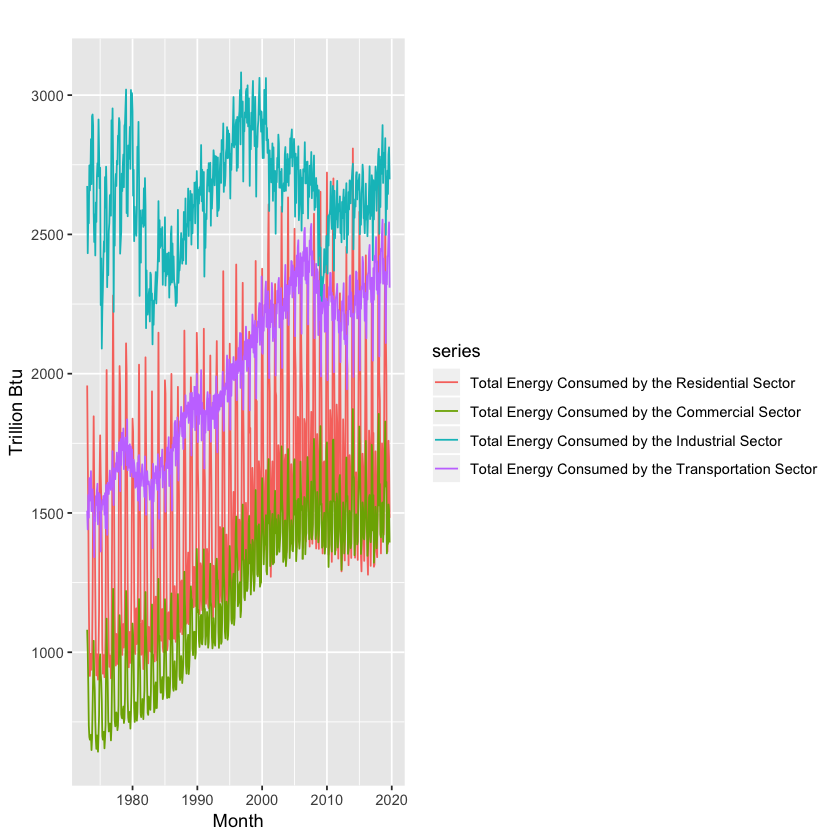

In [24]:
autoplot(SectorDataTS, ts.colour = 'blue', xlab = "Month", ylab = "Trillion Btu")

##  <span style='color:royalblue'>  5. Check Seasonality </span>

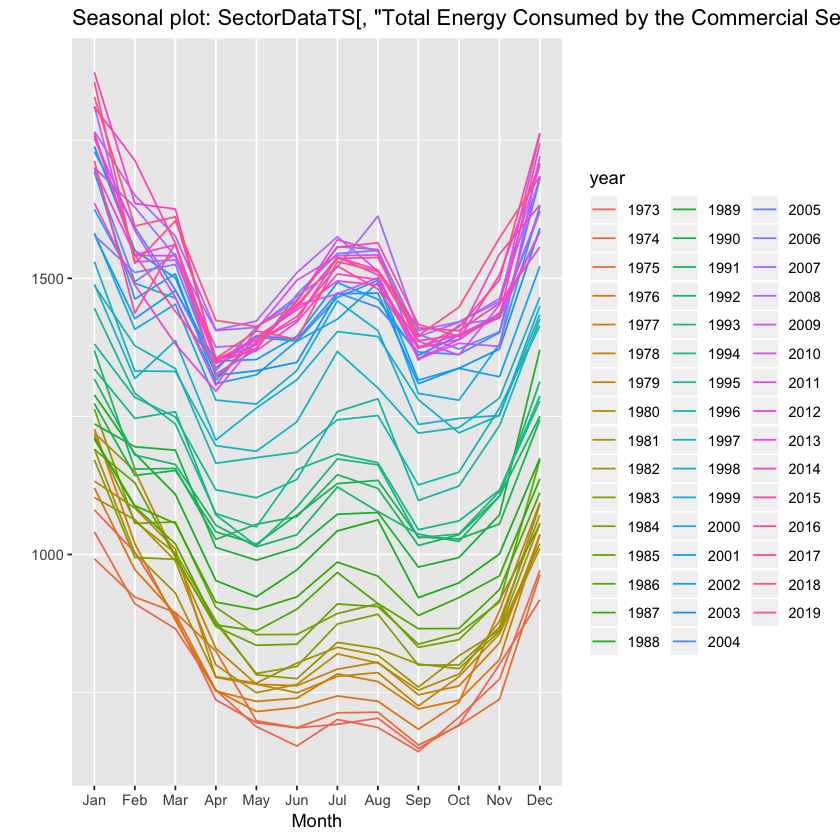

In [27]:
#draw seasonal plots by commercial sector 
ggseasonplot(SectorDataTS[,"Total Energy Consumed by the Commercial Sector"], 
             season.labels=NULL,year.labels=FALSE,year.labels.left=FALSE)

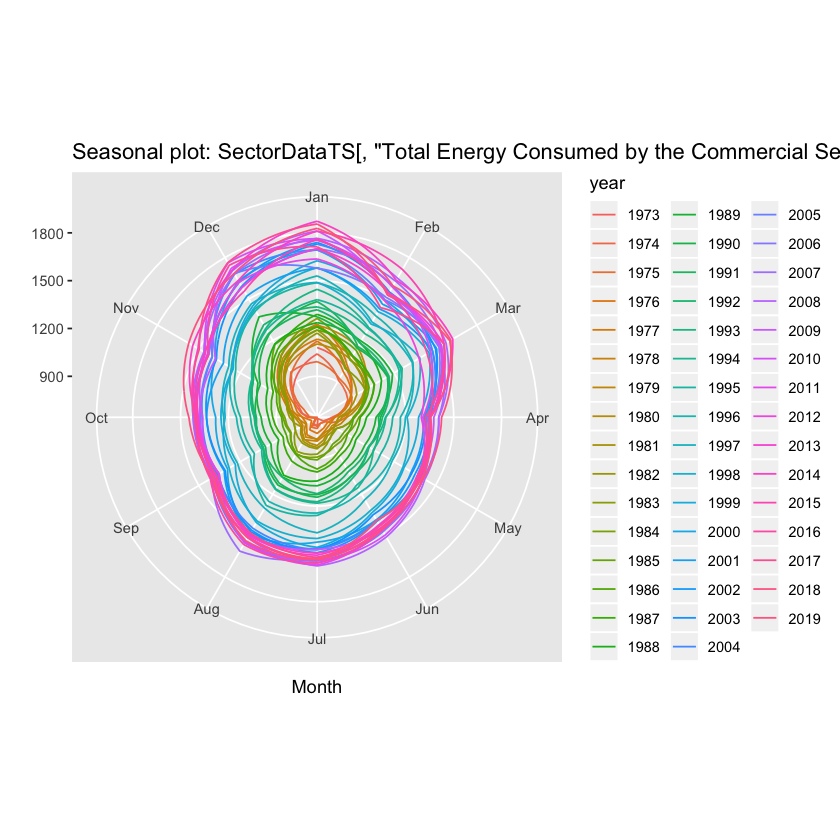

In [28]:
#polar version of seasonal plots 
ggseasonplot(SectorDataTS[,"Total Energy Consumed by the Commercial Sector"], 
             polar=TRUE, season.labels=NULL,year.labels=FALSE,year.labels.left=FALSE)


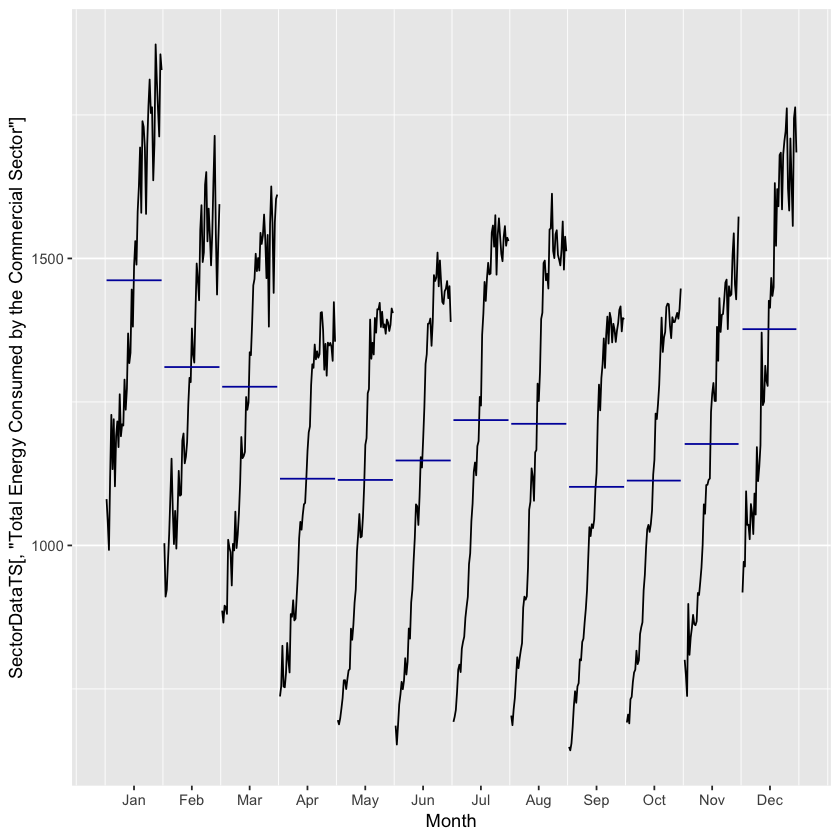

In [11]:
#seasonal Pubseries Plots: show where the data for each season are collected together in separate mini time plots.
ggsubseriesplot(SectorDataTS[,"Total Energy Consumed by the Commercial Sector"])

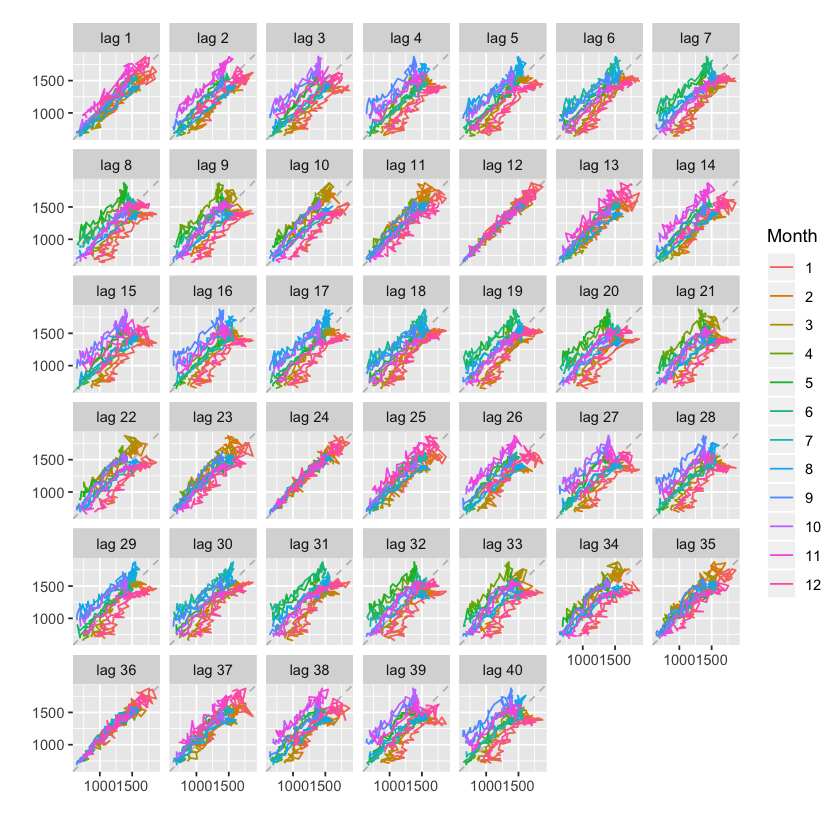

In [12]:
#Draw lag plot of energy consumption by the commercial sector 
gglagplot(SectorDataTS[,"Total Energy Consumed by the Commercial Sector"],lags=40,nrow=NULL,ncol=NULL)

The graph above shows that the relationship is strongly positive at lags 12 and 24 and 36, reflecting the strong seasonality in the data. 

##  <span style='color:royalblue'>  6. Decomposition of time series into components: trend, seasonal and random component  </span>

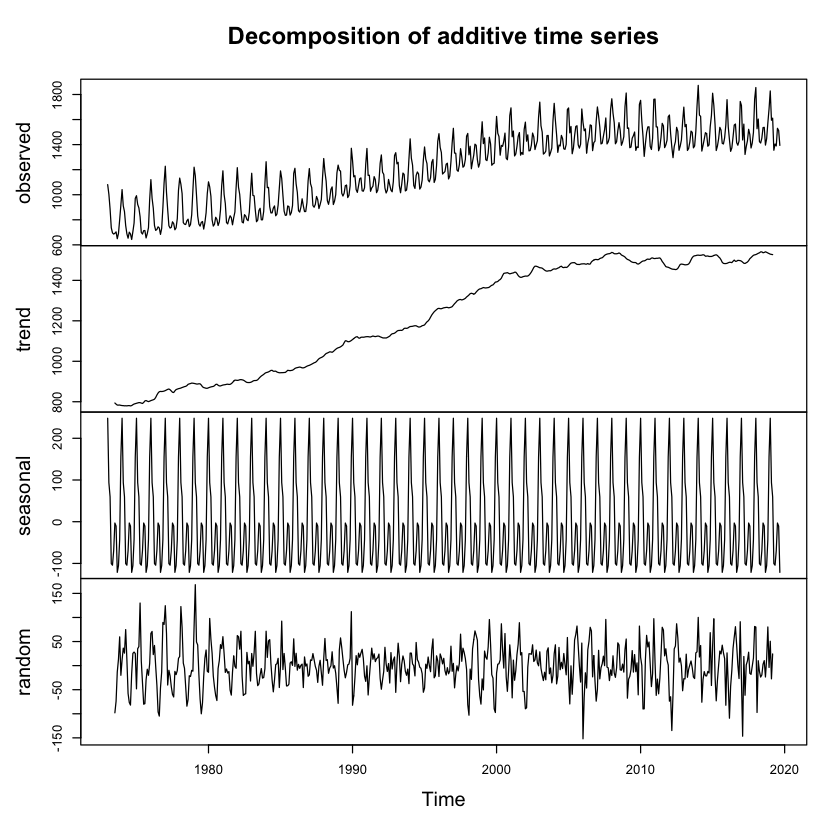

In [29]:
components.ts=decompose(SectorDataTS[,"Total Energy Consumed by the Commercial Sector"])
plot(components.ts)

##  <span style='color:royalblue'>  7. Remove seasonal data from time series </span>
We check the stationarity of the remaining part, and difference the remaining data to make it to stationary. 

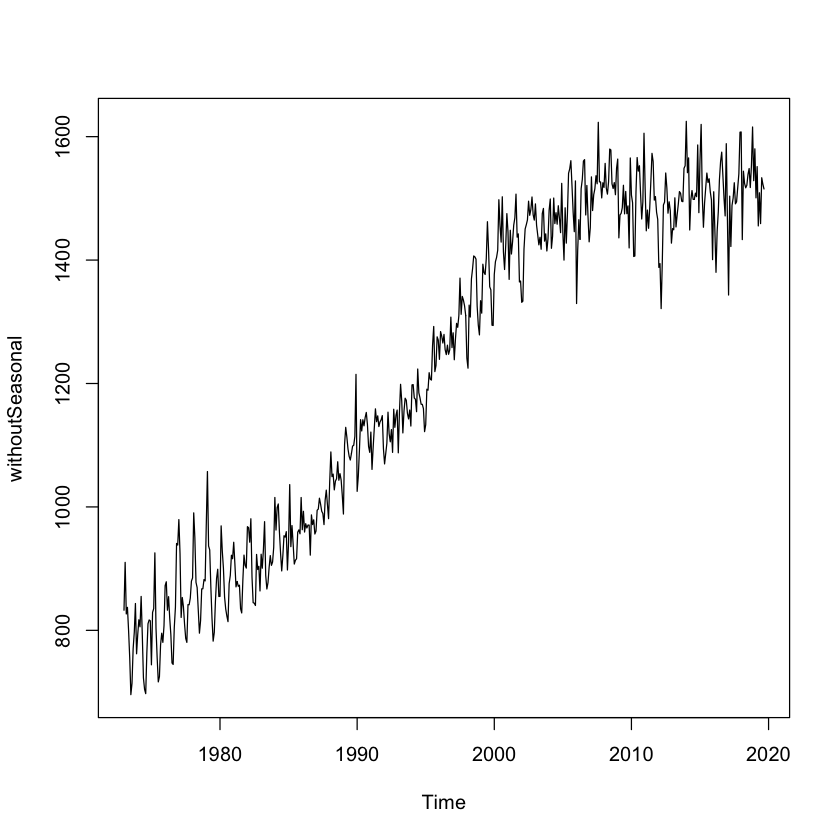

In [14]:
seasonal<-components.ts$seasonal
withoutSeasonal<-SectorDataTS[,"Total Energy Consumed by the Commercial Sector"] - seasonal 
plot(withoutSeasonal)##  <span style='color:royalblue'>  5. Check Seasonality </span>

##  <span style='color:royalblue'>  8. Iterate until time series is stationary </span>
Use ndiffs() to get the order of difference needed. That is, ndiffs() gives the optimal parameter 'd' for ARIMA model. Then use diff() to difference the data.  

[1] 1

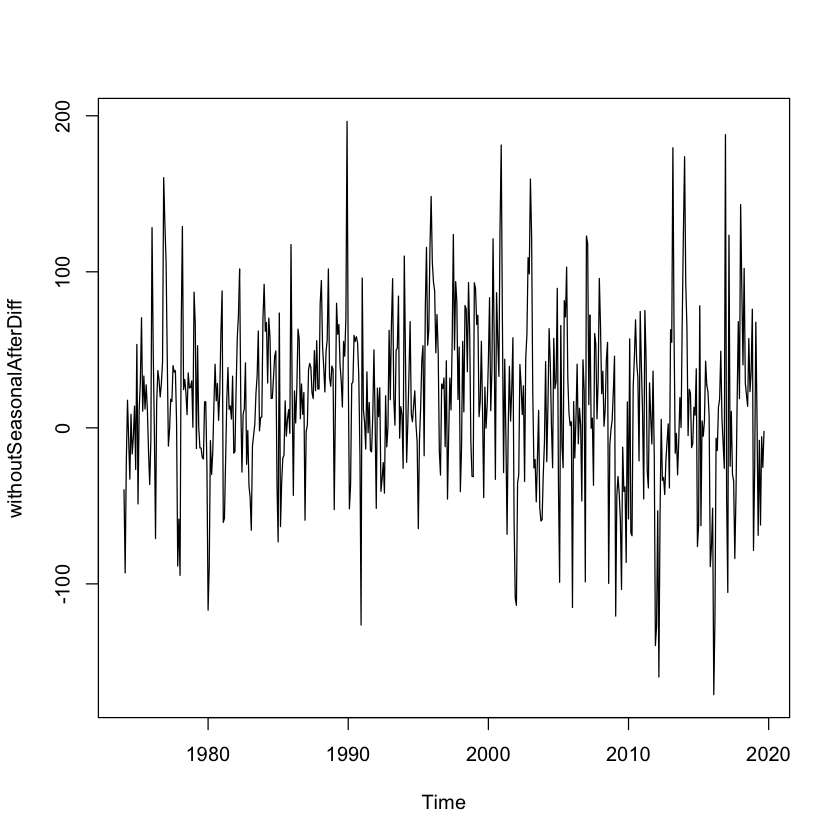

In [30]:
ndiffs(withoutSeasonal)
withoutSeasonalAfterDiff<-diff(withoutSeasonal,lag=12)
plot(withoutSeasonalAfterDiff)

##  <span style='color:royalblue'>  9. Autocorrelation Function   </span>
- Draw the autocorrelation function (ACF) of energy consumption by the commercial sector. This measures the linear relationship between lagged values of a time series. 
- Use ACF to find the parameter p for ARIMA. 
- Draw the partial auto-correlation function (PACF) to find the parameter q for ARIMA.

,df,AIC
"arima(withoutSeasonalAfterDiff, order = c(4, 0, 1))",7,5836.909
"arima(withoutSeasonalAfterDiff, order = c(4, 0, 5))",11,5765.574


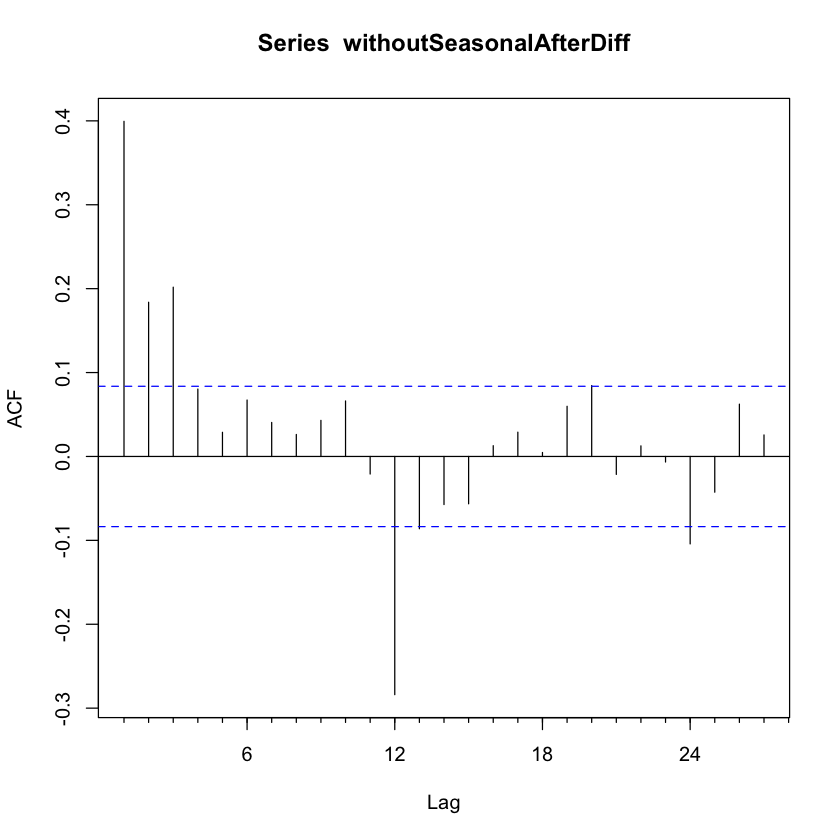

In [34]:
#ACF of data.
Acf(withoutSeasonalAfterDiff,plot=TRUE)
AIC(arima(withoutSeasonalAfterDiff, order=c(4,0,1)),arima(withoutSeasonalAfterDiff,order=c(4,0,5)))

##  <span style='color:royalblue'>  10. Fit the time series model   </span>
We use auto.arima() to fit the time series, which determines the parameters and seasonality automatically. Training set include the first 541 data points, including energy consumption by the residential sector from January 1973 to January 2018. 

In [38]:
trainingModel<-auto.arima(SectorDataTS[1:541,"Total Energy Consumed by the Commercial Sector"],
                          stationary=FALSE,seasonal=TRUE)

##  <span style='color:royalblue'>  11. Test the training model using the data from February 2018 to September 2019.    </span>

In [22]:
testModel<-Arima(SectorDataTS[542:561,"Total Energy Consumed by the Commercial Sector"],
                 model=trainingModel)
accuracy(testModel)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-2.917303,93.12621,77.54267,-0.4730741,5.117415,0.8112288,0.04210046


##  <span style='color:royalblue'>  12. Forecast the energy consumption from October 2019 to September 2020.    </span>

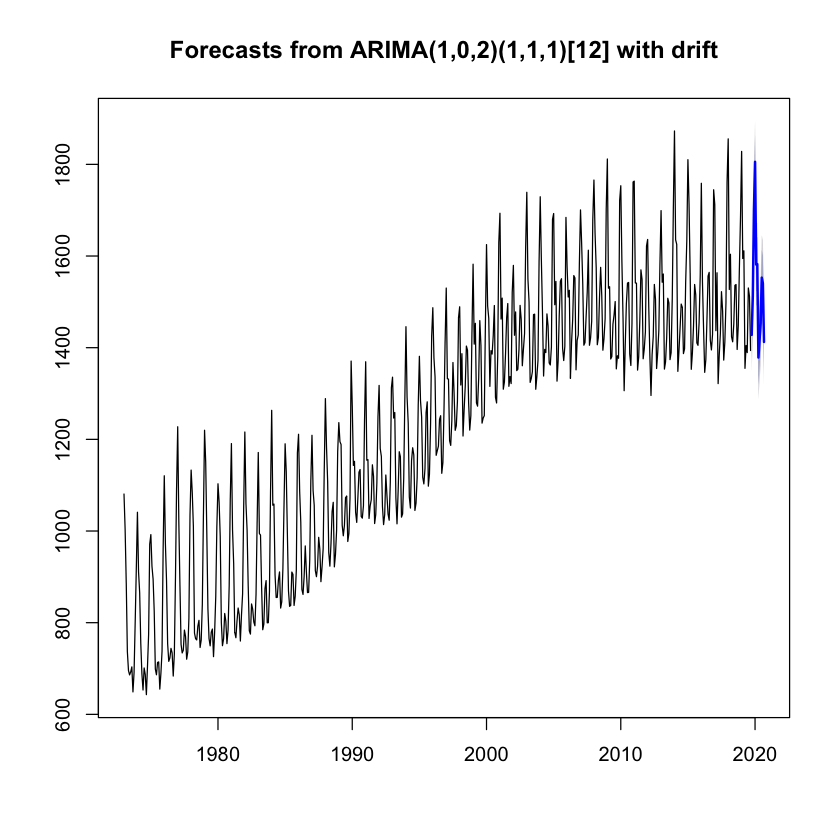

In [39]:
trainingModel<-auto.arima(SectorDataTS[,"Total Energy Consumed by the Commercial Sector"],
                          stationary=FALSE,seasonal=TRUE)
forecast<-forecast(trainingModel,h=12)
plot(forecast)